# Gaussian Naive Bayes Classifier for Breast Cancer Dataset
- Implement a simple program using GaussianNB() to classify the data samples (including train and test data samples). Report the prediction accuracy and confusion matrix of the classifier.
- Add (30-dimensional) zero-mean Gaussian noises with different variances (at least 5, e.g., 50, 100, 200, 400, 800) to the features of the dataset; train Gaussian Naïve Bayes classifiers to classify the noisy datasets and report the prediction accuracies and confusion matrices of the classifiers.

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
import os
import math

In [2]:
# connect to Kaggle open-source database
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# 1. Data Processing 

In [3]:
# import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Note**: we will drop *id* and *Unnamed* columns as they does not contribute to the learning process of the model.

## 1.1. Data Visualization
Let's plot the malignent and benign cancer data points.

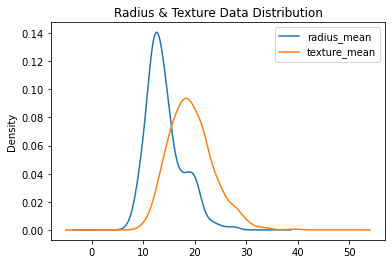

In [5]:
# plot the distribution of points
plt.title("Radius & Texture Data Distribution")
df['radius_mean'].plot(kind='kde')
df['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

## 1.2. Data Processing

In [6]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [7]:
# Examine and replace missing values 
print(df.isnull().values.any())

False


**Note**: split the dataset into input features and labels.

In [8]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [11]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [12]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [13]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 2. Gaussian Naive Bayes On Original Dataset

## 2.1. Create Model

In [14]:
# create model
gnb1 = GaussianNB()

## 2.2. Train Model

In [15]:
# train model on training dataset
gnb1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## 2.3. Test Model

In [16]:
# predict on validate set
y_test_pred = gnb1.predict(X_test)

# predict on train set
y_train_pred = gnb1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.883721
Precision Score = 0.863636
Recall Score = 0.904762
ROC-AUC Score = 0.910714

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[99  9]
 [ 6 57]]
True Negative: 99
False Positive: 9
False Negative: 6
True Positive: 57


# 3. Gaussian Naive Bayes On Noisy Dataset

## 3.1. Data Processing

In [17]:
# re-import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [19]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [20]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [21]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# create noisy Gaussian-distributed noisy data with same matrix size
# Reference: https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

# zero-mean noise with variance 50
noise_1 = np.random.normal(loc=0, scale=math.sqrt(50), size=[569, 30]) 

# zero-mean noise with variance 100
noise_2 = np.random.normal(loc=0, scale=math.sqrt(100), size=[569, 30]) 

# zero-mean noise with variance 200
noise_3 = np.random.normal(loc=0, scale=math.sqrt(200), size=[569, 30]) 

# zero-mean noise with variance 400
noise_4 = np.random.normal(loc=0, scale=math.sqrt(400), size=[569, 30]) 

# zero-mean noise with variance 800
noise_5 = np.random.normal(loc=0, scale=math.sqrt(800), size=[569, 30]) 

## 3.2. Case 1: Add Noise 1 To The Dataset

### 3.2.1. Data Processing

In [24]:
# add noise to dataset
X1 = X + noise_1

In [25]:
# view dataset
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.293584,10.096037,132.561111,995.144215,-1.836150,-2.056588,10.022499,4.484563,4.770951,9.473964,...,35.362867,13.061877,190.749126,2020.687029,2.097618,17.250511,5.219314,-8.947701,-4.502409,5.894352
1,11.565622,24.608019,127.875620,1324.461697,8.015848,-2.978110,5.983057,0.282012,-7.619165,0.278156,...,17.123631,16.502078,153.367260,1967.101079,-2.966337,1.088127,5.703537,-2.993572,3.565813,-9.478696
2,16.686252,27.080851,121.322932,1200.647941,7.587831,-5.440449,-6.834941,3.702628,-8.037224,-14.878826,...,17.585391,22.186750,156.391580,1705.866893,4.974501,7.514040,1.461932,2.731687,-11.557846,0.534811
3,17.624743,22.685254,70.329707,384.080995,-1.512067,-17.606034,10.614289,3.977970,-8.285628,8.699961,...,10.614963,25.294364,108.713867,563.015555,12.709467,-6.123498,4.789287,-3.434207,-2.189754,0.382869
4,21.593674,7.050464,133.675659,1297.936556,0.132470,-10.252575,4.045365,10.693652,-4.588106,0.551070,...,25.140515,22.599050,167.602308,1574.340713,-3.256226,-18.564052,-6.053526,3.940933,-0.271549,-18.380601


In [26]:
# view dataset
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.293584,10.096037,132.561111,995.144215,-1.836150,-2.056588,10.022499,4.484563,4.770951,9.473964,...,35.362867,13.061877,190.749126,2020.687029,2.097618,17.250511,5.219314,-8.947701,-4.502409,5.894352
1,11.565622,24.608019,127.875620,1324.461697,8.015848,-2.978110,5.983057,0.282012,-7.619165,0.278156,...,17.123631,16.502078,153.367260,1967.101079,-2.966337,1.088127,5.703537,-2.993572,3.565813,-9.478696
2,16.686252,27.080851,121.322932,1200.647941,7.587831,-5.440449,-6.834941,3.702628,-8.037224,-14.878826,...,17.585391,22.186750,156.391580,1705.866893,4.974501,7.514040,1.461932,2.731687,-11.557846,0.534811
3,17.624743,22.685254,70.329707,384.080995,-1.512067,-17.606034,10.614289,3.977970,-8.285628,8.699961,...,10.614963,25.294364,108.713867,563.015555,12.709467,-6.123498,4.789287,-3.434207,-2.189754,0.382869
4,21.593674,7.050464,133.675659,1297.936556,0.132470,-10.252575,4.045365,10.693652,-4.588106,0.551070,...,25.140515,22.599050,167.602308,1574.340713,-3.256226,-18.564052,-6.053526,3.940933,-0.271549,-18.380601


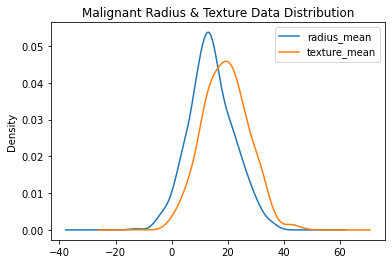

In [27]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X1['radius_mean'].plot(kind='kde')
X1['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [28]:
# data normalization
X1_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X1 = X1_scaler.fit_transform(X1)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [29]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

### 3.2.2. Create Model

In [30]:
# create model
gnb2_1 = GaussianNB()

### 3.2.3. Train Model

In [31]:
# train model on training dataset
gnb2_1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.2.4. Test Model

In [32]:
# predict on validate set
y_test_pred = gnb2_1.predict(X_test)

# predict on train set
y_train_pred = gnb2_1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.361809
Validating MSE = 0.304094
F1 Score = 0.890756
Precision Score = 0.946429
Recall Score = 0.841270
ROC-AUC Score = 0.906746

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.923977
Confusion Matrix = 
[[105   3]
 [ 10  53]]
True Negative: 105
False Positive: 3
False Negative: 10
True Positive: 53


## 3.3. Case 2: Add Noise 2 To The Dataset

### 3.3.1. Data Processing

In [33]:
# add noise to dataset
X2 = X + noise_2

In [34]:
# view dataset
X2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.709850,5.997011,133.472316,998.893628,-10.915696,3.008967,0.643860,2.171644,2.298087,17.848529,...,28.476017,28.544697,184.679799,2019.102098,1.789053,14.051644,5.101639,-13.950437,-0.917700,-19.324599
1,23.255358,20.965029,140.289817,1317.421055,0.885179,15.716215,-7.902671,8.188579,0.942236,6.906758,...,14.894915,38.534199,172.241980,1959.550642,8.163608,-8.365889,-7.637540,13.182847,-14.069907,-4.768281
2,34.725951,23.893681,122.617805,1215.246833,2.201533,-9.248384,13.692745,-16.439038,-5.757682,-7.343156,...,29.143865,7.241848,150.907075,1706.692115,9.523560,-20.589420,10.649398,3.266314,-2.423085,-4.366970
3,13.777342,36.497495,70.419996,395.350418,-7.878364,1.906155,-18.566481,-11.412188,2.588399,3.089216,...,5.389278,20.531293,103.661187,573.341882,8.007609,3.167243,11.098766,9.604193,2.909710,2.133881
4,29.077517,24.646030,127.793732,1295.288108,11.726426,7.022491,19.553326,-0.566602,7.995613,9.140175,...,13.716389,18.510272,145.603417,1568.577019,-7.826494,1.080221,4.877497,11.464481,22.056430,1.440903


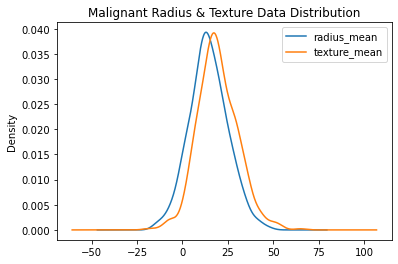

In [35]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X2['radius_mean'].plot(kind='kde')
X2['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [36]:
# data normalization
X2_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X2 = X2_scaler.fit_transform(X2)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [37]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

### 3.3.2. Create Model

In [38]:
# create model
gnb2_2 = GaussianNB()

### 3.3.3. Train Model

In [39]:
# train model on training dataset
gnb2_2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.3.4. Test Model

In [40]:
# predict on validate set
y_test_pred = gnb2_2.predict(X_test)

# predict on train set
y_train_pred = gnb2_2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.351759
Validating MSE = 0.304094
F1 Score = 0.892562
Precision Score = 0.931034
Recall Score = 0.857143
ROC-AUC Score = 0.910053

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.923977
Confusion Matrix = 
[[104   4]
 [  9  54]]
True Negative: 104
False Positive: 4
False Negative: 9
True Positive: 54


## 3.4. Case 3: Add Noise 3 To The Dataset

### 3.4.1. Data Processing

In [41]:
# add noise to dataset
X3 = X + noise_3

In [42]:
# view dataset
X3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,64.928860,19.164324,122.325598,998.547324,-22.574598,5.783698,7.308290,3.404637,10.608266,-3.328945,...,41.925566,19.615359,168.553170,2030.153311,-0.164282,-35.369696,3.417064,17.724380,-16.799652,19.900817
1,37.695606,17.470437,156.682846,1324.395595,-11.593700,-0.361839,14.920773,13.113382,13.985914,11.413313,...,41.122597,24.245434,176.660018,1960.237800,4.313494,6.787084,19.205742,32.036920,-13.451498,21.104112
2,0.035901,18.061982,111.102168,1176.987970,16.188005,18.736594,0.058630,3.497833,-8.854275,2.565611,...,16.966799,21.250125,160.442774,1715.343305,-6.641242,15.465656,1.086339,-2.813305,-9.546295,-6.821985
3,12.512498,35.634624,81.778835,387.423182,12.144428,-0.155993,6.091394,-6.505290,2.192198,-4.266251,...,1.630602,1.703242,94.360174,560.195208,12.295618,22.997915,-2.346819,-12.768138,-25.604327,22.379419
4,43.164257,25.635857,132.676592,1292.629549,-9.565892,-35.615431,-1.460817,16.856147,-3.728491,-23.640416,...,14.086758,25.333511,144.537202,1603.697885,-1.502455,-3.552035,3.840769,-8.992061,-15.687381,9.671469


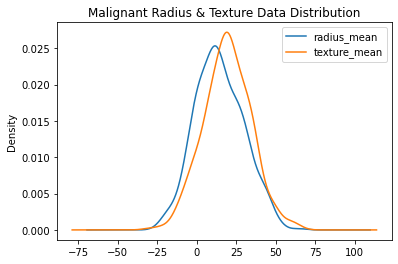

In [43]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X3['radius_mean'].plot(kind='kde')
X3['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [44]:
# data normalization
X3_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X3 = X3_scaler.fit_transform(X3)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [45]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=0)

### 3.4.2. Create Model

In [46]:
# create model
gnb2_3 = GaussianNB()

### 3.4.3. Train Model

In [47]:
# train model on training dataset
gnb2_3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.4.4. Test Model

In [48]:
# predict on validate set
y_test_pred = gnb2_3.predict(X_test)

# predict on train set
y_train_pred = gnb2_3.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.371859
Validating MSE = 0.374269
F1 Score = 0.864407
Precision Score = 0.927273
Recall Score = 0.809524
ROC-AUC Score = 0.886243

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.906433
Confusion Matrix = 
[[104   4]
 [ 12  51]]
True Negative: 104
False Positive: 4
False Negative: 12
True Positive: 51


## 3.5. Case 4: Add Noise 4 To The Dataset

### 3.5.1. Data Processing

In [49]:
# add noise to dataset
X4 = X + noise_4

In [50]:
# view dataset
X4.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,37.571455,38.577579,164.277180,989.221326,17.431119,-15.751521,-34.291123,-18.089915,-31.704176,21.332072,...,85.451262,30.474413,166.502776,2031.041776,-12.600709,3.833064,28.460244,8.937093,21.719693,-26.550462
1,49.091713,9.595379,160.156230,1288.190055,-18.248159,22.196717,35.326599,7.892177,-4.232071,13.425869,...,3.806801,27.310440,155.124422,1957.526335,3.296933,5.796760,-2.586408,9.518137,0.972923,-23.163470
2,28.508424,28.208021,126.638753,1191.658763,-11.561833,-6.615825,10.035356,-36.149343,22.499226,-4.223923,...,-5.951436,33.089038,148.829518,1699.716740,-4.134517,2.827207,-1.603791,-9.162923,-1.992051,-32.306740
3,40.957546,67.390964,38.497062,376.478802,-12.312895,-46.227098,-21.941960,27.506215,15.182358,10.034768,...,36.570764,30.596388,116.714155,558.033384,33.624009,-7.450231,-33.081004,-16.753121,2.645293,16.604160
4,7.392858,42.849888,156.680540,1294.406043,-4.261368,66.027046,7.332529,-7.480870,5.177173,7.453888,...,-8.133291,25.581871,178.976825,1555.684842,-24.326763,38.825109,-0.989499,20.262380,32.934735,-0.502025


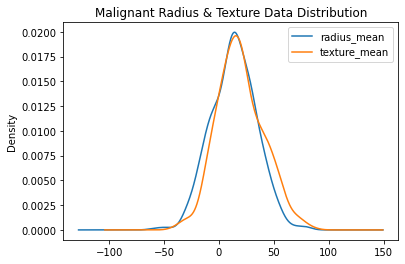

In [51]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X4['radius_mean'].plot(kind='kde')
X4['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [52]:
# data normalization
X4_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X4 = X4_scaler.fit_transform(X4)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [53]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=0)

### 3.5.2. Create Model

In [54]:
# create model
gnb2_4 = GaussianNB()

### 3.5.3. Train Model

In [55]:
# train model on training dataset
gnb2_4.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.5.4. Test Model

In [56]:
# predict on validate set
y_test_pred = gnb2_4.predict(X_test)

# predict on train set
y_train_pred = gnb2_4.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.432161
Validating MSE = 0.350877
F1 Score = 0.873950
Precision Score = 0.928571
Recall Score = 0.825397
ROC-AUC Score = 0.894180

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[104   4]
 [ 11  52]]
True Negative: 104
False Positive: 4
False Negative: 11
True Positive: 52


## 3.6. Case 5: Add Noise 5 To The Dataset

### 3.6.1. Data Processing

In [57]:
# add noise to dataset
X5 = X + noise_5

In [58]:
# view dataset
X5.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,42.986064,-1.508346,105.245099,1051.557972,-21.199232,-30.238527,-27.833676,-17.408690,17.397042,26.083739,...,44.754475,28.910691,209.463392,2022.027048,4.630047,29.774991,24.119755,17.717576,46.032883,28.136987
1,1.576341,32.639566,122.003085,1294.817681,42.074753,32.757052,-15.356804,13.284753,-31.045220,29.118303,...,17.489479,-12.556954,188.373148,1986.903498,5.423944,16.390981,-3.082010,-36.073133,41.599962,-46.640463
2,30.542100,-3.845142,120.415249,1215.327994,-15.709419,-44.093000,66.369644,-47.854349,12.144186,-35.530766,...,91.240937,24.653858,156.685799,1738.400705,-3.107084,-49.444789,-29.335068,51.094038,22.556909,10.975524
3,25.144763,10.445568,67.038837,369.892667,17.812073,-58.259543,19.558778,-37.037241,0.154527,-42.562473,...,32.127728,48.015943,116.046234,555.121819,41.041269,19.777395,52.051796,-18.862752,-4.034671,34.365525
4,35.907094,39.766069,156.817718,1298.367941,-40.681863,9.791915,-33.746915,32.380436,19.155420,10.579784,...,21.440719,40.574573,162.912637,1540.076420,33.015073,-53.162416,-12.840007,-18.091067,-22.559268,-1.991746


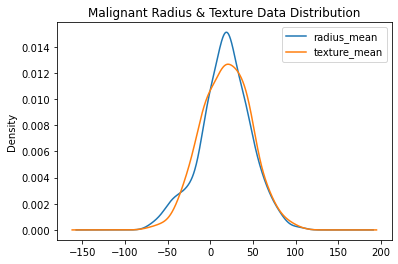

In [59]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
X5['radius_mean'].plot(kind='kde')
X5['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [60]:
# data normalization
X5_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X5 = X5_scaler.fit_transform(X5)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [61]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=0)

### 3.6.2. Create Model

In [62]:
# create model
gnb2_5 = GaussianNB()

### 3.6.3. Train Model

In [63]:
# train model on training dataset
gnb2_5.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.6.4. Test Model

In [64]:
# predict on validate set
y_test_pred = gnb2_5.predict(X_test)

# predict on train set
y_train_pred = gnb2_5.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.432161
Validating MSE = 0.280702
F1 Score = 0.898305
Precision Score = 0.963636
Recall Score = 0.841270
ROC-AUC Score = 0.911376

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.929825
Confusion Matrix = 
[[106   2]
 [ 10  53]]
True Negative: 106
False Positive: 2
False Negative: 10
True Positive: 53
